In [2]:
import os
import shutil

pdb_path = '/home/lwang/AI-HDX-main/HDX_MS_dataset/database_collection'
# Get a list of all pdb files in the subfolder
save_path = '/home/lwang/AI-HDX-main/HDX_MS_dataset/database_collection/feature/HDX_files'
subfolder = os.listdir(pdb_path)
count = 0
for folder in subfolder:
    if folder.split('.')[0] == '':
        continue
    elif folder == 'feature':
        continue
    
    if os.path.isfile(f'{pdb_path}/{folder}/apo_revised_modified.xlsx'):
        shutil.copy(os.path.join(pdb_path, folder, f'apo_revised_modified.xlsx'), os.path.join(save_path, f'{folder}.xlsx'))
        count += 1
print(count)


36


feature output: dssp, rigidity

In [1]:
## output dssp (RSA) for each amino acid  ##
from RUN_FIRST import pdb_clean
from output_dssp import output_dssp
import pandas as pd
import os
import warnings
from Bio import PDB

warnings.filterwarnings("ignore")

root_dir = '/home/lwang/models/HDX_LSTM/data/test_set'
pdb_dir = f'{root_dir}/structure'
dssp_dir = f'{root_dir}/dssp_files'
if os.path.isdir(dssp_dir) == False:
    os.mkdir(dssp_dir)

fname = 'merged_data.xlsx'
apo_df = pd.read_excel(f'{root_dir}/{fname}', sheet_name='test_set')
apo_df = apo_df.dropna(subset=['chain_identifier'])
fail_list = []

for index, row in apo_df.iterrows():
    pdb_fname = row['apo_identifier'].strip().split('.')[0]
    #chain_id = row['chain_identifier'].strip()
    #uni_id = row['match_uni'].strip()
        
    if os.path.isfile(f'{root_dir}/structure/{pdb_fname}.pdb'):
        try:
            parser = PDB.PDBParser()
            filepath = f'{root_dir}/structure/{pdb_fname}.pdb'
            structure = parser.get_structure('AF_structure', filepath)
            chain_ids = list(structure.get_chains())

            if not os.path.isfile(f'{root_dir}/structure/{pdb_fname}_clean.pdb'):
                pdb_clean(f'{root_dir}/structure/{pdb_fname}.pdb', f'{root_dir}/structure/{pdb_fname}_clean.pdb')
            print('start processing', f'{pdb_fname}')    

            for chain_id in chain_ids:
                chain_id = chain_id.get_id()
                if os.path.isfile(f'{root_dir}/dssp_files/{pdb_fname}_{chain_id}.dssp.txt'):
                    continue
                output_dssp(f'{pdb_fname}_{chain_id}', f'{root_dir}/structure/{pdb_fname}_clean.pdb', chain_id, f'{root_dir}/dssp_files')

        except Exception as e:
            fail_list.append(pdb_fname)
            print(e)
            continue
    else:
        print(f'{root_dir}/structure/{pdb_fname}.pdb does not exist')
print(fail_list)

start processing RXRRAR_AF_rank1
start processing RXRRAR_AF_rank1
start processing p672CCL8_AF_rank1
start processing p672CCL8_AF_rank1
start processing 8pe9
start processing AcrBdimer_AF_rank1
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
start processing CSN3-CSN8_complex
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
/home/lwang/models/HDX_L

In [2]:
### output fasta file for hhblits ###
from predataprocess import get_pdb_seq
from Bio import PDB
import pandas as pd
import os

root_dir = '/home/lwang/models/HDX_LSTM/data/test_set'
fname = 'merged_data.xlsx'
apo_df = pd.read_excel(f'{root_dir}/{fname}', sheet_name='test_set')
apo_df = apo_df.dropna(subset=['chain_identifier'])
fail_list = []

for index, row in apo_df.iterrows():
    pdb_fname = row['apo_identifier'].strip().split('.')[0]
    #chain_id = row['chain_identifier'].strip()
    #uni_id = row['match_uni'].strip()
    print('start processing', f'{pdb_fname}')        
    if os.path.isfile(f'{root_dir}/structure/{pdb_fname}.pdb'):
        try:
            parser = PDB.PDBParser()
            filepath = f'{root_dir}/structure/{pdb_fname}.pdb'
            structure = parser.get_structure('AF_structure', filepath)
            chain_ids = list(structure.get_chains())
            for chain_id in chain_ids:
                chain_id = chain_id.get_id()
                sequence, residue_indices = get_pdb_seq(structure, chain_id)
                if os.path.isdir(f'{root_dir}/fasta_files') == False:
                    os.mkdir(f'{root_dir}/fasta_files')
                with open(f'{root_dir}/fasta_files/{pdb_fname}_{chain_id}.fasta', 'w') as f:
                    f.write(f'>{pdb_fname}_{chain_id}\n')
                    f.write(sequence)
        except Exception as e:
            print(e)
            fail_list.append(pdb_fname+'_'+chain_id)
            continue
    else:
        print(f'{root_dir}/structure/{pdb_fname}.pdb does not exist')
print(fail_list)

start processing RXRRAR_AF_rank1
start processing RXRRAR_AF_rank1
start processing p672CCL8_AF_rank1
start processing p672CCL8_AF_rank1
start processing 8pe9
start processing AcrBdimer_AF_rank1
start processing CSN_complex
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
start processing CSN_complex
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
start processing CSN_complex
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
start processing CSN_complex
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
start processing CSN_complex
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
start processing CSN_complex
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
start processing CSN_complex
/home/lwang/models/HDX_LSTM/data/test_set/structure/CSN_complex.pdb does not exist
start processing CSN_c

In [ ]:
### secondary structure one-hot encoding ###
root_dir = '/home/lwang/models/HDX_LSTM/data/test_set'
dssp_dir = f'{root_dir}/dssp_files'

def one_of_k_encoding(x, allowable_set):
    if x not in allowable_set:
        raise Exception("input {0} not in allowable set{1}:".format(x, allowable_set))
    return [int(x == s) for s in allowable_set]

folder_list = os.listdir(dssp_dir)
for folder in folder_list:
    if folder == '.DS_Store':
        continue

    dssp_file = f'{dssp_dir}/{folder}'
    with open(dssp_file, 'r') as f:
        for line in f:
            content = line.split()
            dssp_value = round(float(content[3]), 4)
            ss_type = content[2]
            ss_list = ['H', 'B', 'E', 'G', 'I', 'T', 'S', 'P', '-']
            ss_encoding = one_of_k_encoding(ss_type, ss_list)
            print(ss_type)
            print(ss_encoding)
/home/lwang/AI-HDX-main/HDX_MS_dataset/database_collection/feature/fasta_files

In [ ]:
### add H to pdb file, then run FIRST ###
### usually need to run separately in terminal ###
import os
import shutil
from RUN_FIRST import RUN_FIRST, copyfiles, pdb_clean, hbplus

root_dir = '/home/lwang/models/HDX_LSTM/data/test_set'
proflex_dir = f'/home/lwang/AI-HDX-main/ProteinComplex_HDX_prediction/prog/ProFlex-master/proflex'
hbplus_dir = '/home/lwang/AI-HDX-main/ProteinComplex_HDX_prediction/prog/hbplus'

pdb_dir = f'{root_dir}/structure'
save_dir = f'{root_dir}/proflex_files'

if os.path.isdir(save_dir) == False:
    os.mkdir(save_dir)

fname = 'merged_data.xlsx'
apo_df = pd.read_excel(f'{root_dir}/{fname}', sheet_name='test_set')
apo_df = apo_df.dropna(subset=['chain_identifier'])

for index, row in apo_df.iterrows():
    pdb_fname = row['apo_identifier'].strip().split('.')[0]
    #chain_id = row['chain_identifier'].strip()
    #uni_id = row['match_uni'].strip()

    pdb_fpath = f'{root_dir}/structure/{pdb_fname}.pdb'

    proflex_name = f'{pdb_fname}_clean_Hplus_proflexdataset'
    if os.path.isfile(f'{save_dir}/{proflex_name}'):
        continue           
    
    if os.path.isfile(pdb_fpath):
        try:
            print('start processing', f'{pdb_fname}') 
            pdb_folder = f'{root_dir}/structure/'
            if pdb_clean(pdb_fpath, f'{hbplus_dir}/{pdb_fname}_clean.pdb') == False:
                raise Exception('pdb_clean failed')
            hbplus(hbplus_dir, f'{pdb_fname}_clean', pdb_folder)

            pdb_fname = pdb_fname+'_clean_Hplus'       
            pdb_clean(f'{pdb_folder}/{pdb_fname}.pdb', f'{proflex_dir}/{pdb_fname}.pdb')
            RUN_FIRST(proflex_dir, f'{pdb_fname}.pdb', '-h')
            copyfiles(pdb_fname, proflex_dir, save_dir)

        except Exception as e:
            fail_list.append(pdb_fname)
            print(e)
            continue
print(fail_list)

In [ ]:
### add H to single pdb file ###
from RUN_FIRST import hbplus, pdb_clean

hbplus_dir = '/Users/liyao/Desktop/Tsuda_Lab/Source_code/hbplus/'
pdb_dir = f'/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/structure/B5BTR7'
file = 'AF-B5BTR7-F1-model_v4.pdb'

pdb_clean(f'{pdb_dir}/{file}', f'{hbplus_dir}/{file}')
hbplus(hbplus_dir, file, pdb_dir)

In [14]:
### convert proflex output to ASSURR flexibility index ###

from prot_rigidity import ASSURR_flexibility

root_dir = '/home/lwang/models/HDX_LSTM/data/test_set'
proflex_dir = f'{root_dir}/proflex_files'
dssp_dir = f'{root_dir}/dssp_files'
save_dir = f'{root_dir}/rigidity_files'
if os.path.isdir(save_dir) == False:
    os.mkdir(save_dir)

fname = 'merged_data.xlsx'
apo_df = pd.read_excel(f'{root_dir}/{fname}', sheet_name='test_set')
apo_df = apo_df.dropna(subset=['chain_identifier'])
fail_list = []

for index, row in apo_df.iterrows():
    pdb_fname = row['apo_identifier'].strip().split('.')[0]
    print('start processing', f'{pdb_fname}')        
    if os.path.isfile(f'{root_dir}/structure/{pdb_fname}.pdb'):
        parser = PDB.PDBParser()
        filepath = f'{root_dir}/structure/{pdb_fname}.pdb'
        structure = parser.get_structure('AF_structure', filepath)
        chain_ids = list([chain.id for chain in structure.get_chains()])
        dssp_file = [f'{dssp_dir}/{pdb_fname}_{chain_id}.dssp.txt' for chain_id in chain_ids]
        ASSURR_flexibility(pdb_fname, dssp_file, proflex_dir, save_dir)

start processing RXRRAR_AF_rank1
extracted ss list shape: (924,)
processing RXRRAR_AF_rank1
start processing RXRRAR_AF_rank1
extracted ss list shape: (924,)
processing RXRRAR_AF_rank1
start processing p672CCL8_AF_rank1
extracted ss list shape: (224,)
processing p672CCL8_AF_rank1
start processing p672CCL8_AF_rank1
extracted ss list shape: (224,)
processing p672CCL8_AF_rank1
start processing 8pe9
extracted ss list shape: (599,)
processing 8pe9
start processing AcrBdimer_AF_rank1
extracted ss list shape: (794,)
processing AcrBdimer_AF_rank1
start processing CSN_complex
start processing CSN_complex
start processing CSN_complex
start processing CSN_complex
start processing CSN_complex
start processing CSN_complex
start processing CSN_complex
start processing CSN_complex
start processing CSN3-CSN8_complex
extracted ss list shape: (558,)
processing CSN3-CSN8_complex
start processing CSN_complex
start processing CSN_complex
start processing CSN_complex
start processing CSN_complex
start proces

In [ ]:
### assemble features into embedding ###



In [1]:
import pandas as pd
import os
from polyR_model import seq_embedding

def prepare_data():
    apo_df = pd.DataFrame()
    mutation_df = pd.DataFrame()
    apo_count = 0
    mutation_count = 0 
    root_dir = "/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection"
    apo_path = f"{root_dir}/merged_apo.xlsx"
    apo_df = pd.read_excel(apo_path, sheet_name='Sheet1')
    apo_df = apo_df.dropna(subset=['chain_identifier'])

    manager_path = f"{root_dir}/manager.txt"
    manager = open(manager_path, 'r')
    manager.readline()
    available_list = []
    for line in manager:
        content = line.split(':')
        available_list.append(content[0])

    input_array = []
    truth_array = []
    error_id = []

    for index, row in apo_df.iterrows():
        identidier = row['database_id'].strip()
        if identidier not in available_list:
            continue
        uni_id = row['match_uni'].strip()
        state = row['state'].strip()
        apo_pdb = row['apo_identifier'].strip().split('.')[0]
        chain_id = row['chain_identifier'].strip()

        #print(identidier, uni_id, state)

        example_input = f"{root_dir}/{identidier}/apo_revised_modified.xlsx"
        mut_intput = f"{root_dir}/{identidier}/mutation_revised_modified.xlsx"
        example_embedding = f'{root_dir}/feature/embedding_files/{apo_pdb}_{chain_id}.embedding.txt'
        if os.path.isfile(example_embedding) == False or os.path.isfile(example_input) == False:
            #print(example_embedding, example_input)
            continue
        
        if os.path.isfile(mut_intput):
            temp_apo_df = pd.read_excel(example_input, sheet_name='Sheet1')
            #temp_mutation_df = pd.read_excel(mut_intput, sheet_name='Sheet1')

            apo_df = pd.concat([apo_df, temp_apo_df], ignore_index=True)
            #mutation_df = pd.concat([mutation_df, temp_mutation_df], ignore_index=True)

        prot1, truth, start_pos, end_pos, log_t = seq_embedding(example_input, example_embedding, state)
        input_array.append(prot1)
        truth_array.extend(truth)

    #apo_df = apo_df.drop_duplicates(subset=['sequence'], keep='first')
    #mutation_df = mutation_df.drop_duplicates(subset=['sequence'], keep='first')
    #print(apo_df.shape[0], mutation_df.shape[0])
    return input_array, truth_array

## FIXME: currently can iterate through all the files, but there are many mismatch records ##
## FIXME: consider the exposure time, there are 20k pep apo sequences ##

(2860, 30, 47) (2860,)
training x: (2002, 30)
training y: (2002,)
test x: (858, 30)
test y: (858,)
R2 score: 0.5971016425258246
RMSE: 0.1270722172104855
Pearson: PearsonRResult(statistic=0.7854299226519129, pvalue=1.5764380066335197e-180)


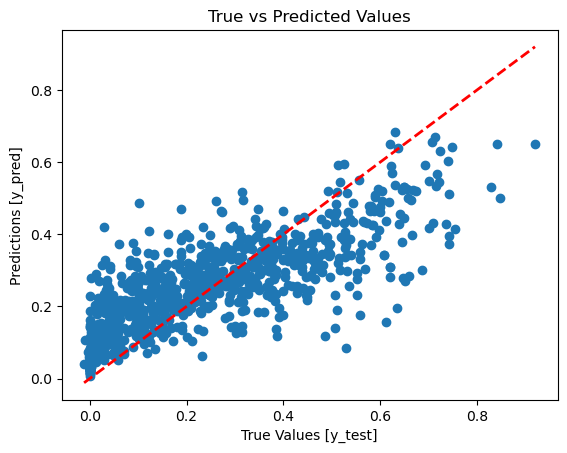

In [2]:


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

input_array = []
truth_array = []
input_array, truth_array = prepare_data()
input_array = np.concatenate(input_array, axis=0)
truth_array = np.array(truth_array)/100

'''
# Find indices where NaNs are present in input_array and truth_array
nan_indices_input = np.where(np.isnan(input_array).any(axis=(1, 2)))[0]
nan_indices_truth = np.where(np.isnan(truth_array))[0]

# Combine the indices
nan_indices = np.union1d(nan_indices_input, nan_indices_truth)

# Filter out rows with NaNs in both arrays
input_array_filtered = np.delete(input_array, nan_indices, axis=0)
truth_array_filtered = np.delete(truth_array, nan_indices)

print(f"Original input_array shape: {input_array.shape}")
print(f"Filtered input_array shape: {input_array_filtered.shape}")
print(f"Original truth_array shape: {truth_array.shape}")
print(f"Filtered truth_array shape: {truth_array_filtered.shape}")
'''
# featrue format[1-47]: 1: SASA, 2-6: HDMD,  7-15:ss one-hot, 16:rigidity,   17-46: HHblits, 47: log_time
x = input_array.reshape(input_array.shape[0], -1, input_array.shape[1])
#indices = list(range(1, 47))
#x= np.delete(x, indices, axis=-1)

y = truth_array
x = x + 1e-10
print(x.shape, y.shape)

np.save('/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/x_drop_duplicate.npy', x)
np.save('/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/y_drop_duplicate.npy', y)


x = np.mean(x, axis=2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print('training x:', x_train.shape)
print('training y:', y_train.shape)
print('test x:', x_test.shape)
print('test y:',y_test.shape)

try:
# Initialize the Random Forest Regressor
    random_forest_model = RandomForestRegressor(n_estimators=100, random_state=50, max_features='sqrt')
    random_forest_model.fit(x_train, y_train)
    y_pred = random_forest_model.predict(x_test)

    print('R2 score:', r2_score(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Pearson:', pearsonr(y_test, y_pred))

    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values [y_test]')
    plt.ylabel('Predictions [y_pred]')
    plt.title('True vs Predicted Values')

    # Optional: add a line representing perfect predictions
    max_value = max(y_test.max(), y_pred.max())
    min_value = min(y_test.min(), y_pred.min())
    plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

    plt.show()      
except Exception as e:
    print(e)


In [17]:
### save model ###
from joblib import dump, load

root_dir = "/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection"
model_path = f"{root_dir}/feature/model_files/RF_240123.joblib"
dump(random_forest_model, model_path)

['/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/model_files/RF_240123.joblib']

torch.Size([11515, 1, 47, 30])
(11515,)


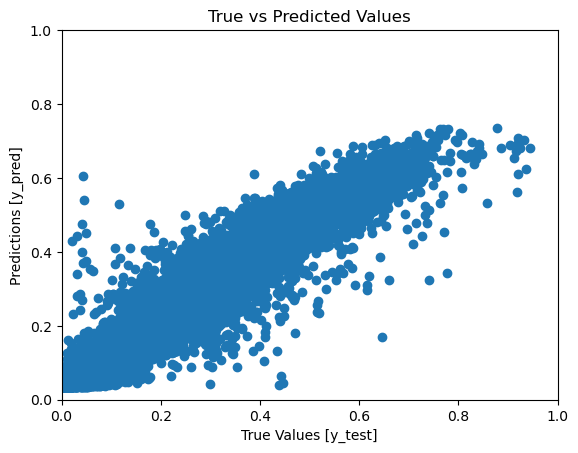

In [33]:
### load LSTM model ###
import pandas as pd
import os
from polyR_model import seq_embedding
import numpy as np
import joblib
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr, zscore
import matplotlib.pyplot as plt
from binding_site_extraction import read_PDB, bindingsite_extract

import torch
from torch_lstm import CustomModel

##################################### initial setting ##################################### 
root_dir = "/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature"
HDX_summary_file = '/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/merged_apo.xlsx'
manager_path = f"{root_dir}/../manager.txt"

dssp_dir = os.path.join(root_dir, 'dssp_files')
hhm_dir = os.path.join(root_dir, 'hhm_files')
rigidity_dir = os.path.join(root_dir, 'rigidity_files')
embedding_dir = os.path.join(root_dir, 'embedding_files')
proflex_dir = os.path.join(root_dir, 'proflex_files')

RF_model_path = '/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/model_files/RF_240123.joblib'
LSTM_model_path = '/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/HDX_MS_dataset/database_collection/feature/model_files/model_weights.pth'
##################################### initial setting ##################################### 

if __name__ == "__main__":
    predict_df = pd.DataFrame()
    count = 0
    x_array = np.empty((0, 30))
    PDB_list = []
    y_pred_list = []
    r2_list = []
    LSTM_model = CustomModel()
    LSTM_model.load_state_dict(torch.load(LSTM_model_path, map_location=torch.device('cpu')))

    input_data = np.load('/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/ProteinComplex_HDX_prediction/script/x.npy')
    labels = np.load('/Users/liyao/Desktop/Tsuda_Lab/Source_code/AI-HDX-main/ProteinComplex_HDX_prediction/script/y.npy')
    input_data = torch.tensor(input_data, dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.float32)

    x = input_data
    y = labels

    LSTM_model.eval()
    x = x.unsqueeze(1)
    print(x.shape)
    with torch.no_grad():
        y_pred = LSTM_model(x)
    y_pred = y_pred.squeeze().numpy()
    print(y_pred.shape)

    #### sort prediction by start position ####
    #sorted_lists = sorted(zip(start_pos, end_pos, log_t, y_pred, y), key=lambda x: x[0])
    #start_pos, end_pos, log_t, y_pred, y = zip(*sorted_lists)


    ### plot y_pred vs y ###
    plt.figure()
    plt.scatter(y, y_pred)
    plt.xlabel('True Values [y_test]')
    plt.ylabel('Predictions [y_pred]')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title('True vs Predicted Values')
    plt.show()


In [3]:
import os
import pandas as pd
import shutil

root_dir = '/home/lwang/AI-HDX-main/HDX_MS_dataset/database_collection'
save_dir = '/home/lwang/AI-HDX-main/HDX_MS_dataset/complexpair_dataset/HDX_files'

summary_file = '/home/lwang/AI-HDX-main/HDX_MS_dataset/complexpair_dataset/merged_complex_pair.xlsx'
summary_df = pd.read_excel(summary_file, sheet_name='Sheet1')
folder_list = summary_df['database_id'].unique()

for folder in folder_list:
    print(folder)
    fpath = os.path.join(root_dir, folder, 'mutation_revised_modified.xlsx')
    if os.path.isfile(fpath):
        dst_fpath = os.path.join(save_dir, f'{folder}.xlsx')
        shutil.copy(fpath, dst_fpath)
        print('copied')
    else:
        print('not exist')

MSV000088425
copied
MSV000089247
copied
PXD010586
copied
PXD013051
copied
PXD015778
copied
PXD019367
copied
PXD023434
copied
